# BACTERIA

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [4]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-zli9vueq/85750c0d-d9eb-4864-9864-8589da498e24/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-kxpsky7l/a28539c6-5382-481b-a1e9-b7abde228115/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-kxpsky7l/a28539c6-5382-481b-a1e9-b7abde228115/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    400
      0.28 seconds: Joined    300 of    400
Initial topology in 0.34 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.38 seconds: ME NNI round 2 of 35, 301 of 401 splits, 30 changes (max delta 0.154)
      0.52 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.63 seconds: SPR round   1 of   2, 201 of 804 nodes
      0.73 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.94 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.05 seconds: SPR round   1 of   2, 601 of 804 nodes
      1.1

## ALPHA AND BETA DIVERSITY

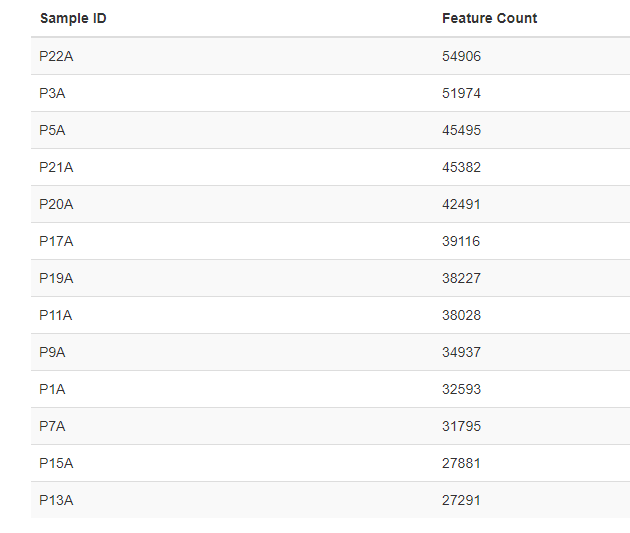

In [6]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [7]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [8]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/ba_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [9]:
# set sampling_depth based on alpha rarefacation curve
depth = 25000
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006449433354706866 and the largest is 1.4093416326725747.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-207l1dps/bbcfcb04-ff67-4fd0-9481-ffbe1eee4e47/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-up91ovna

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-207l1dps/bbcfcb04-ff67-4fd0-9481-ffbe1eee4e47/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-ns2znzd0

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.002064825413527507 and the largest is 0.16023897684971888.
  warn(


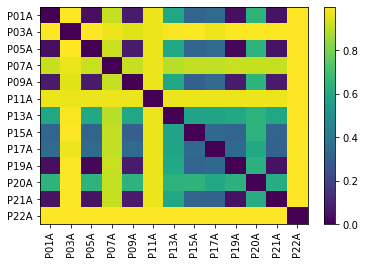

In [10]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

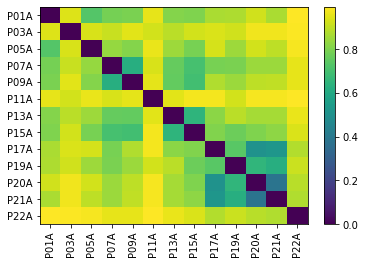

In [11]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [12]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 232c49c0-702f-4859-9fe6-cf3c35f9cfd0>

In [13]:
#alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
#    steps =  100
#)
#
## save alpha_rarefacion
#alpha_rarefaction.visualization.save('./results/alpha_rar.qzv')
# load alpha_rarefacion
qzv_file_alpha = q2.Visualization.load('./results/alpha_rar.qzv')

In [14]:
qzv_file_alpha

<visualization: Visualization uuid: 06b5ce9c-ccc5-485e-9ad7-7f16736e6615>

In [15]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

observed_features  fisher_alpha       chao1  shannon_entropy  \
Sample ID                                                                 
P01A                    28.0      3.114313   33.000000         0.337654   
P03A                    81.0     10.404936   81.000000         4.193852   
P05A                    19.0      2.015762   22.333333         0.120282   
P07A                    52.0      6.272026   53.200000         2.280360   
P09A                    25.0      2.741790   26.428571         0.480278   
P11A                    91.0     11.893721   92.500000         5.276246   
P13A                    72.0      9.091277   72.750000         3.298017   
P15A                    39.0      4.525945   42.111111         1.498730   
P17A                   120.0     16.366503  120.166667         2.737044   
P19A                    42.0      4.922002   46.000000         0.179507   
P20A                    82.0     10.552469   84.000000         1.905110   
P21A                    75.0      9.526280   97.750000         0.521658   
P22A                    96.0     12.648950   99.750000         3.969842   

            simpson  
Sample ID            
P01A       0.072608  
P03A       0.877427  
P05A       0.023262  
P07A       0.708170  
P09A       0.135410  
P11A       0.956886  
P13A       0.797581  
P15A       0.499651  
P17A       0.563716  
P19A       0.033015  
P20A       0.609086  
P21A       0.100247  
P22A       0.876701

In [16]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [17]:
# simpson viz
visualizations['simpson']

<visualization: Visualization uuid: 776e5d49-3a51-4f69-8bc5-fc1a2c4c71a7>

In [18]:
# observed_features viz
visualizations['observed_features']

<visualization: Visualization uuid: bce88752-64c9-4d00-b516-2369d5e6be30>

In [19]:
# fisher_alpha viz
visualizations['fisher_alpha']

<visualization: Visualization uuid: 85a4de16-319e-4cf4-b199-68b01fe3df7b>

In [20]:
# chao1 viz
visualizations['chao1']

<visualization: Visualization uuid: 7bee10c5-c47b-4fa3-a228-83767424af06>

In [21]:
# shannon viz
visualizations['shannon']

<visualization: Visualization uuid: e982e99e-6abd-466f-9732-fda276bf1012>

In [22]:
# evenness_vector viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.evenness_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: c257e5bb-681e-428e-baee-7f91b532fe11>

In [23]:
# faith_pd viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.faith_pd_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 20e45a5e-a042-48fb-a97c-b68c044ae84c>

### BETA DIVERSITY

In [24]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [25]:
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [26]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 25000
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0004869609861877082 and the largest is 1.326228133540749.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-v93oxnqt/d2e2ceca-9fb7-4c31-8ad5-902642cfee03/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-apl606j3

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-v93oxnqt/d2e2ceca-9fb7-4c31-8ad5-902642cfee03/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-7pmpfc3z

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0019219477566693114 and the largest is 0.15316137243815853.
  warn(


In [27]:
depth = 25000
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0002918840001259161 and the largest is 0.8368338842979319.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-f1eo3ti9/a7e2da3b-9f6f-4445-9f87-46263980fdde/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-z9dpifrm

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-f1eo3ti9/a7e2da3b-9f6f-4445-9f87-46263980fdde/data/feature-table.biom -t /tmp/qiime2-archive-rcn7ja_8/f64b446a-d35c-48e0-86ee-f9f14562da95/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-khuowe5h

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0007630861381378409 and the largest is 0.10159865268904555.
  warn(


#### PERMANOVA

In [28]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: f1de66a4-b3f5-4c73-a459-691d42538187>

<Figure size 432x288 with 0 Axes>

In [29]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 2289b785-c25f-4bb4-a4bc-16fedd560e1e>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [30]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: 49934461-a909-4de9-8bc7-1e1b8a1471e3>

<Figure size 432x288 with 0 Axes>

In [31]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 507978b9-c39f-4be5-b0cd-a5f261c07779>

<Figure size 432x288 with 0 Axes>